In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [24]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

In [25]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [26]:
df.shape

(962, 2)

In [27]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

c:\Users\NEHA\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


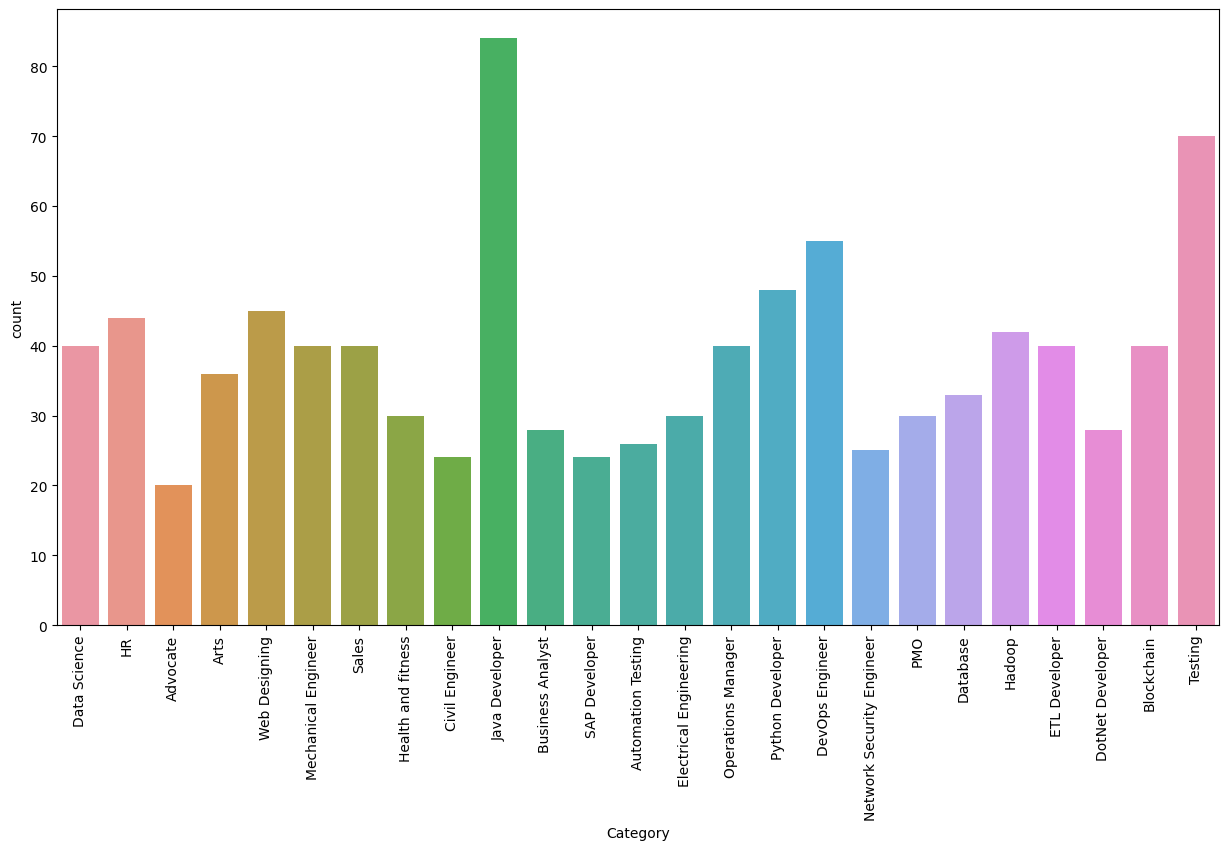

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [29]:
df['Category'][0]

'Data Science'

In [30]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Cleaning Data:<br>
url's<br>
hashtags<br>
mentions<br>
special letter<br>
puctuations<br>

In [31]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText




    

In [32]:
df['Resume']=df['Resume'].apply(lambda x:cleanResume(x))

In [33]:
df['Resume'] #cleaned data

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [34]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


Encoding(Words-->categorical values)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [36]:
# # Ensure LabelEncoder is fitted
# le.fit(df['Category'])

# # Get category-to-label mapping
# category_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# # Print the correct mapping
# print("Category Mapping (Text Label → Encoded Number):")
# print(category_mapping)

# # Reverse mapping (Encoded Number → Text Label)
# reverse_mapping = {v: k for k, v in category_mapping.items()}

# print("Reverse Mapping (Encoded Number → Text Label):")
# print(reverse_mapping)

le.fit(df['Category'])
df['Category']=le.transform(df['Category'])


In [37]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

Vectorization

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(stop_words='english',max_features=5000)

VectorizeText=tfidf.fit_transform(df['Resume'])
X=VectorizeText


In [39]:
VectorizeText

<962x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 154639 stored elements in Compressed Sparse Row format>

In [40]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to a ept the challenges Positive ...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


Data Splitting=>train,test split (80:20)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(VectorizeText,df['Category'],test_size=0.2,random_state=42)

In [42]:
X_train.shape

(769, 5000)

Model Training

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns



In [44]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [45]:
models = {
    "KNN Classifier": KNeighborsClassifier(n_neighbors=5),
    "Naïve Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [46]:
for name, model in models.items():
    print(f"\nTraining {name} with OneVsRestClassifier...\n")
    ovr_model = OneVsRestClassifier(model)
    ovr_model.fit(X_train, y_train)
    y_pred = ovr_model.predict(X_test)

    # Performance Metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    # print("\nClassification Report:")
    # print(classification_report(y_test, y_pred, target_names=le.classes_))



Training KNN Classifier with OneVsRestClassifier...

Accuracy: 0.9845
Confusion Matrix:
[[ 3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  0  0  0  0  0  0

In [47]:
#Using SVC for this
svc_model = OneVsRestClassifier(SVC(probability=True))  # Wrap SVC inside OneVsRestClassifier
svc_model.fit(X_train, y_train)


OneVsRestClassifier(estimator=SVC(probability=True))

In [48]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

Prediction of model


In [49]:
def pred(input_resume):
    # Preprocess the input text (e.g., cleaning, etc.)
    cleaned_text = cleanResume(input_resume) 

    # Vectorize the cleaned text using the same TF-IDF vectorizer used during training
    vectorized_text = tfidf.transform([cleaned_text])
    
    # Convert sparse matrix to dense
    vectorized_text = vectorized_text.toarray()

    # Prediction
    predicted_category = svc_model.predict(vectorized_text)

    # get name of predicted category
    predicted_category_name = le.inverse_transform(predicted_category)

    return predicted_category_name[0]

In [51]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""
pred(myresume)

'Data Science'

prediction for sample test 2

In [52]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""
pred(myresume)

'Network Security Engineer'

In [54]:
myresume="""Detail-oriented and highly motivated Civil Engineer with [X] years of experience in structural design, site supervision, and project management. Skilled in AutoCAD, STAAD Pro, and construction management, with a strong understanding of civil engineering principles and safety regulations. Adept at collaborating with multidisciplinary teams to deliver high-quality infrastructure projects on time and within budget.

Education
[Your Degree in Civil Engineering] | [University Name], [Year of Graduation]

Technical Skills
 Structural Design & Analysis (AutoCAD, STAAD Pro, ETABS)
 Construction Management & Site Supervision
 Estimation & Costing
 Project Planning (Primavera, MS Project)
 Geotechnical & Environmental Engineering
 BIM & Revit Modeling
 Quality Control & Safety Regulations

Work Experience
Civil Engineer | [Company Name] | [Location] | [Year – Present]

Supervised construction activities to ensure compliance with engineering drawings and safety standards.
Designed structural components using AutoCAD and STAAD Pro, optimizing material usage and cost.
Coordinated with contractors, architects, and government authorities for project approvals.
Conducted site inspections and quality checks to maintain project efficiency.
Site Engineer (Internship/Previous Role) | [Company Name] | [Location] | [Year]

Assisted in surveying, leveling, and material testing for road and bridge construction.
Prepared daily reports on work progress and ensured timely execution of tasks.
Managed documentation, including BOQs, work schedules, and project reports.
Projects
[Project Name]  Designed and supervised a [describe project, e.g., residential building, highway, bridge].
 [Project Name] Assisted in structural analysis and material selection for [describe project].

Certifications
 Certified in Project Management (PMP, PRINCE2) (if applicable)
 AutoCAD / STAAD Pro / Revit Certification (if applicable)
 Safety & Quality Management Certification (if applicable)

Soft Skills
Leadership & Team Collaboration
 Problem-Solving & Critical Thinking
 Communication & Client Interaction
 Time Management & Deadline Adherence

Languages (if relevant)
English (Fluent)
Hindi (Fluent)
[Other Languages]"""
pred(myresume)

'Civil Engineer'

In [58]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(svc_model, open('clf.pkl', 'wb'))
pickle.dump(le, open("encoder.pkl",'wb'))

In [61]:
myresume="""Detail-oriented and highly motivated Civil Engineer with [X] years of experience in structural design, site supervision, and project management. Skilled in AutoCAD, STAAD Pro, and construction management, with a strong understanding of civil engineering principles and safety regulations. Adept at collaborating with multidisciplinary teams to deliver high-quality infrastructure projects on time and within budget.

Education
[Your Degree in Civil Engineering] | [University Name], [Year of Graduation]

Technical Skills
 Structural Design & Analysis (AutoCAD, STAAD Pro, ETABS)
 Construction Management & Site Supervision
 Estimation & Costing
 Project Planning (Primavera, MS Project)
 Geotechnical & Environmental Engineering
 BIM & Revit Modeling
 Quality Control & Safety Regulations

Work Experience
Civil Engineer | [Company Name] | [Location] | [Year – Present]

Supervised construction activities to ensure compliance with engineering drawings and safety standards.
Designed structural components using AutoCAD and STAAD Pro, optimizing material usage and cost.
Coordinated with contractors, architects, and government authorities for project approvals.
Conducted site inspections and quality checks to maintain project efficiency.
Site Engineer (Internship/Previous Role) | [Company Name] | [Location] | [Year]

Assisted in surveying, leveling, and material testing for road and bridge construction.
Prepared daily reports on work progress and ensured timely execution of tasks.
Managed documentation, including BOQs, work schedules, and project reports.
Projects
[Project Name]  Designed and supervised a [describe project, e.g., residential building, highway, bridge].
 [Project Name] Assisted in structural analysis and material selection for [describe project].

Certifications
 Certified in Project Management (PMP, PRINCE2) (if applicable)
 AutoCAD / STAAD Pro / Revit Certification (if applicable)
 Safety & Quality Management Certification (if applicable)

Soft Skills
Leadership & Team Collaboration
 Problem-Solving & Critical Thinking
 Communication & Client Interaction
 Time Management & Deadline Adherence

Languages (if relevant)
English (Fluent)
Hindi (Fluent)
[Other Languages]"""
import pickle

clf=pickle.load(open('clf.pkl','rb'))

cleaned_resume=cleanResume(myresume)
input_feature=tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_feature.toarray())[0]


category_mapping={
    6:"Data Science",
    12:"HR",  
    0:"Advocate",  
    1:"Arts",
    24:"Web Designing ",
    16:"Mechanical Engineeer ",
    22:"Sales",
    14:"Health and fitness ",
    5:" Civil Engineer",
    15:"Java Developer ",
    4:"Business Analyst ",
    21:"SAP Developer ",
    2:"Automation Testing ",
    11:"Electrical Engineer ",
    18:"Operations Manager ",
    20:"Python Developer ",
    8:"DevOps Engineer",
    17:"Network Security Engineer  ",
    19:"PMO ",
    7:" Database", 
    13:"Hadoop ",
    10:"ETL Developer ",
    9:"DotNet Developer ",
    3:"Blockchain ",
    23:"Testing",
}
category_name = category_mapping.get(prediction_id,"unknown")

print("predicted Category:",category_name)



predicted Category:  Civil Engineer
